<a href="https://colab.research.google.com/github/RemnantArgon001/Project2/blob/main/Copy_of_Project_2_Part_3_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [387]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [388]:
import pandas as pd
import numpy as np


Second choice: Fuel consumption 

1) Source of data https://www.kaggle.com/datasets/rinichristy/2022-fuel-consumption-ratings

2) Brief description of data:Dataset provides model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada in 2022.

3) What is the target? Fuel Consumption(Comb (mpg)

4) Is this a classification or regression problem? Regression

5) How many features?15

6) How many rows of data.946

7) What, if any, challenges do your foresee in cleaning, exploring, or modeling with this dataset? having to ensure of no leakage lots of values to classify as well as ohe

In [389]:
df=pd.read_csv('/content/MY2022 Fuel Consumption Ratings.csv')

In [390]:
df.head()

,Model Year,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
0,2022,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,33,200,6,3
1,2022,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263,4,5
2,2022,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,Z,11.0,8.6,9.9,29,232,5,6
3,2022,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,Z,11.3,9.1,10.3,27,242,5,6
4,2022,Acura,TLX SH-AWD,Compact,2.0,4,AS10,Z,11.2,8.0,9.8,29,230,5,7


In [391]:
df.shape

(946, 15)

Out of the two data sets I have provided I was allowed to select either one of them. 
I have chosen to go with my second choice Fuel Consumption. 


In [392]:
#Deleating unessisary columns
#first I will take a deeper dive into my data looking at columns that would not be needed as they provide no real value in determining fuel consumption. 

In [393]:
from pandas.core.algorithms import value_counts

In [394]:
df['Model Year'].value_counts()

2022    946
Name: Model Year, dtype: int64

In [395]:
#Converting L/100km to US MPG (approx) code is now # out as I do not want it continuously mutilplying these colums as I go further in my code. 

In [397]:
from numpy.ma.core import multiply
#df[['Fuel Consumption (City (L/100 km)','Fuel Consumption(Hwy (L/100 km))','Fuel Consumption(Comb (L/100 km))']] = (df[['Fuel Consumption (City (L/100 km)','Fuel Consumption(Hwy (L/100 km))','Fuel Consumption(Comb (L/100 km))']] * 2.352145)

In [398]:
df.head()

,Model Year,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
0,2022,Acura,ILX,Compact,2.4,4,AM8,Z,23.286236,16.465015,20.228447,33,200,6,3
1,2022,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS10,Z,29.637027,22.110163,26.344024,25,263,4,5
2,2022,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,Z,25.873595,20.228447,23.286236,29,232,5,6
3,2022,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,Z,26.579239,21.404519,24.227094,27,242,5,6
4,2022,Acura,TLX SH-AWD,Compact,2.0,4,AS10,Z,26.344024,18.817160,23.051021,29,230,5,7


In [399]:
# we have confirmed that the entire data set only has cars from the year 2022 this column can be dropped. as well as model.
df.drop(labels=['Model Year','Fuel Consumption(Comb (L/100 km))','Model'],axis=1, inplace=True)

In [400]:
#confirm column is dropped from data frame.
df.head()

,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
0,Acura,Compact,2.4,4,AM8,Z,23.286236,16.465015,33,200,6,3
1,Acura,SUV: Small,3.5,6,AS10,Z,29.637027,22.110163,25,263,4,5
2,Acura,SUV: Small,2.0,4,AS10,Z,25.873595,20.228447,29,232,5,6
3,Acura,SUV: Small,2.0,4,AS10,Z,26.579239,21.404519,27,242,5,6
4,Acura,Compact,2.0,4,AS10,Z,26.344024,18.817160,29,230,5,7


In [401]:
# I am chosing to keep the rest of my data 

In [402]:
# checking for dupicate values in my data set. 

In [403]:
df.duplicated().value_counts()

False    843
True     103
dtype: int64

In [404]:
# Duplicated is by  product of taking away model identifier I am keeping the duplicates as if make = vehicle class predict target with parameters added features such as cylinders fuel type and transmission even emissions collumns can be used model is too unique and could blur data. 

In [405]:
# check for missing values in data set. 


In [406]:
df.isna().sum()

Make                                 0
Vehicle Class                        0
Engine Size(L)                       0
Cylinders                            0
Transmission                         0
Fuel Type                            0
Fuel Consumption (City (L/100 km)    0
Fuel Consumption(Hwy (L/100 km))     0
Fuel Consumption(Comb (mpg))         0
CO2 Emissions(g/km)                  0
CO2 Rating                           0
Smog Rating                          0
dtype: int64

In [407]:
#Identify and correct any inconsistencies in data for categorical values (i.e. Cat, cat, cats)
# will divide the Fuel Consumption(Comb (mpg)) colum by 1.02 to got unit into U.S mpg as it currently is in imperial 

In [408]:
#df['Fuel Consumption(Comb (mpg))'] = (df['Fuel Consumption(Comb (mpg))'] / 1.02)

In [409]:
df.head()

,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
0,Acura,Compact,2.4,4,AM8,Z,23.286236,16.465015,32.352941,200,6,3
1,Acura,SUV: Small,3.5,6,AS10,Z,29.637027,22.110163,24.509804,263,4,5
2,Acura,SUV: Small,2.0,4,AS10,Z,25.873595,20.228447,28.431373,232,5,6
3,Acura,SUV: Small,2.0,4,AS10,Z,26.579239,21.404519,26.470588,242,5,6
4,Acura,Compact,2.0,4,AS10,Z,26.344024,18.817160,28.431373,230,5,7


In [410]:
#Renaming columns to account for conversions to U.S. MPG

In [411]:
df.rename(columns = {'Fuel Consumption(Comb (mpg))':'U.S.Combinded MPG'}, inplace = True)

In [412]:
df.rename(columns = {'Fuel Consumption (City (L/100 km)':'U.S. City MPG'}, inplace = True)

In [413]:
df.rename(columns = {'Fuel Consumption(Hwy (L/100 km))':'U.S. Hwy MPG'}, inplace = True)

In [414]:
df.head()

,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,U.S. City MPG,U.S. Hwy MPG,U.S.Combinded MPG,CO2 Emissions(g/km),CO2 Rating,Smog Rating
0,Acura,Compact,2.4,4,AM8,Z,23.286236,16.465015,32.352941,200,6,3
1,Acura,SUV: Small,3.5,6,AS10,Z,29.637027,22.110163,24.509804,263,4,5
2,Acura,SUV: Small,2.0,4,AS10,Z,25.873595,20.228447,28.431373,232,5,6
3,Acura,SUV: Small,2.0,4,AS10,Z,26.579239,21.404519,26.470588,242,5,6
4,Acura,Compact,2.0,4,AS10,Z,26.344024,18.817160,28.431373,230,5,7


In [415]:
# lots of excess places after decimal point going to round the the column

In [416]:
df = df.round(1)

In [417]:
import seaborn as sns
from matplotlib import rcParams

In [418]:
sns.set(rc={'figure.figsize':(8,8)})

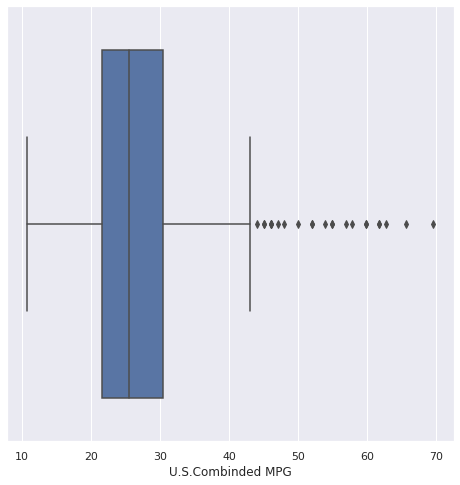

In [419]:
ax = sns.boxplot(x=df["U.S.Combinded MPG"])

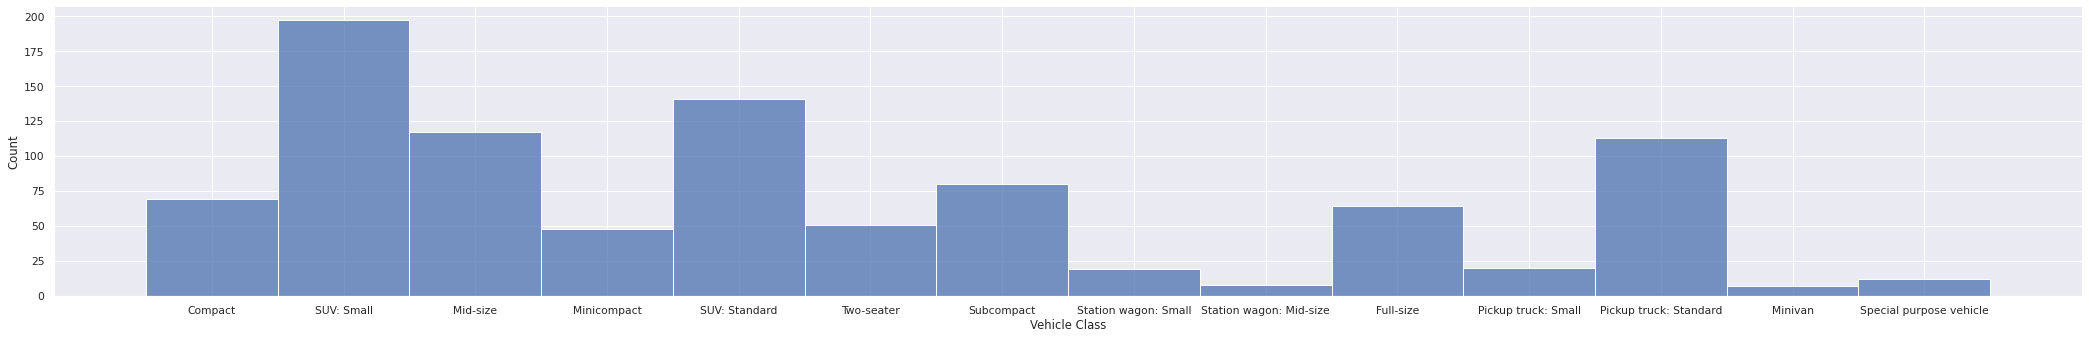

In [420]:
p = sns.displot(data=df, x='Vehicle Class', height=5, aspect=6.0)
p.fig.set_dpi(70)

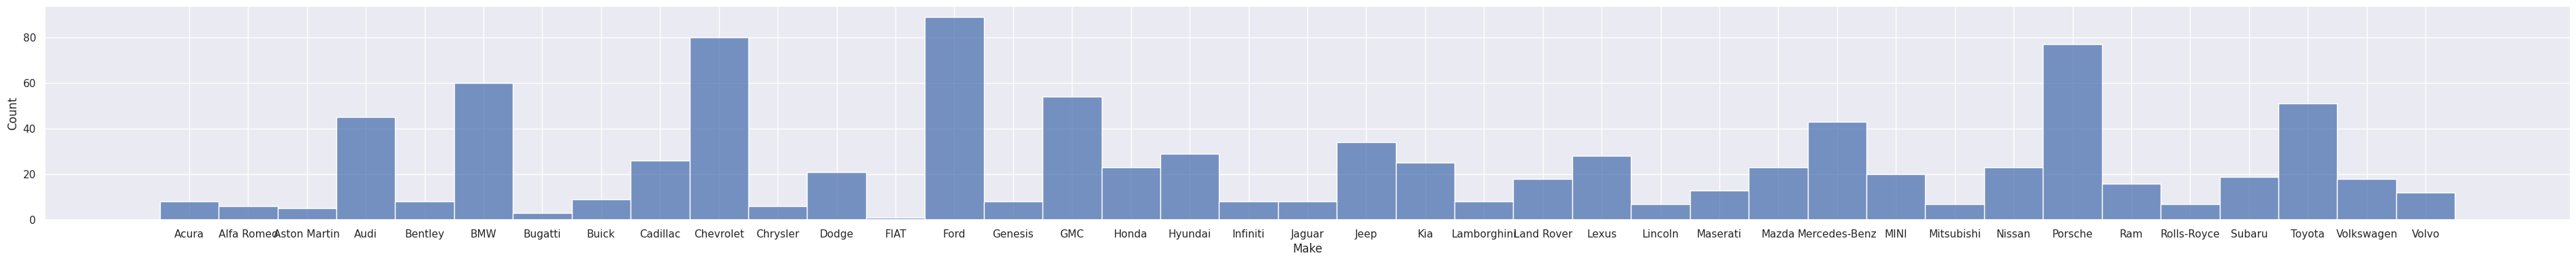

In [421]:
p = sns.displot(data=df, x='Make', height=4, aspect=9.5)
p.fig.set_dpi(100)

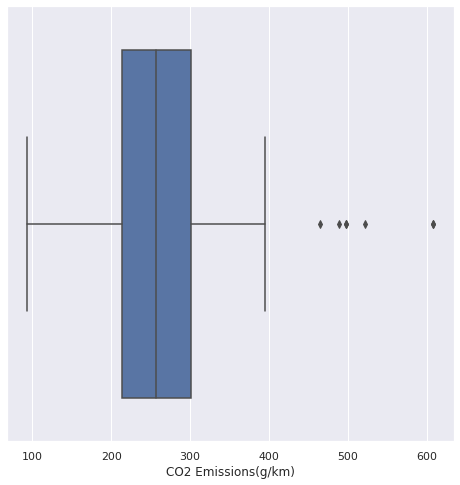

In [422]:
ax = sns.boxplot(x=df["CO2 Emissions(g/km)"])

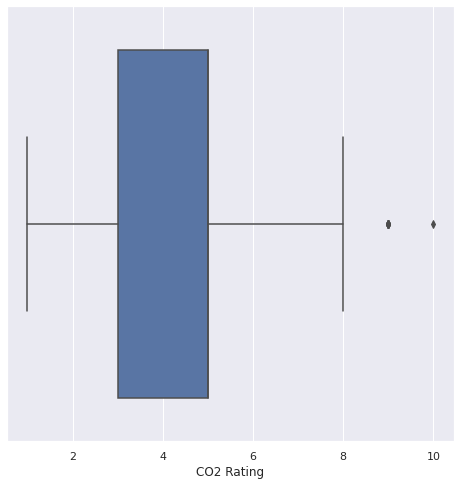

In [423]:
ax = sns.boxplot(x=df["CO2 Rating"])

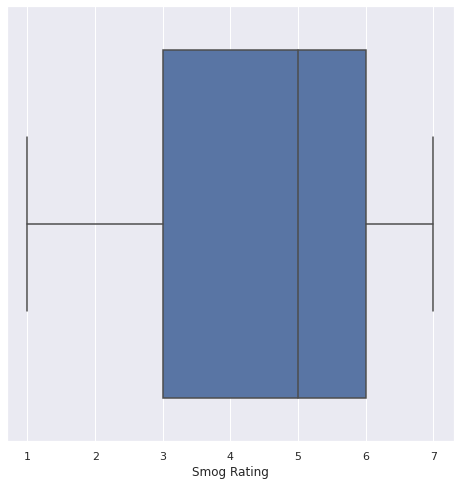

In [424]:
ax = sns.boxplot(x=df["Smog Rating"])

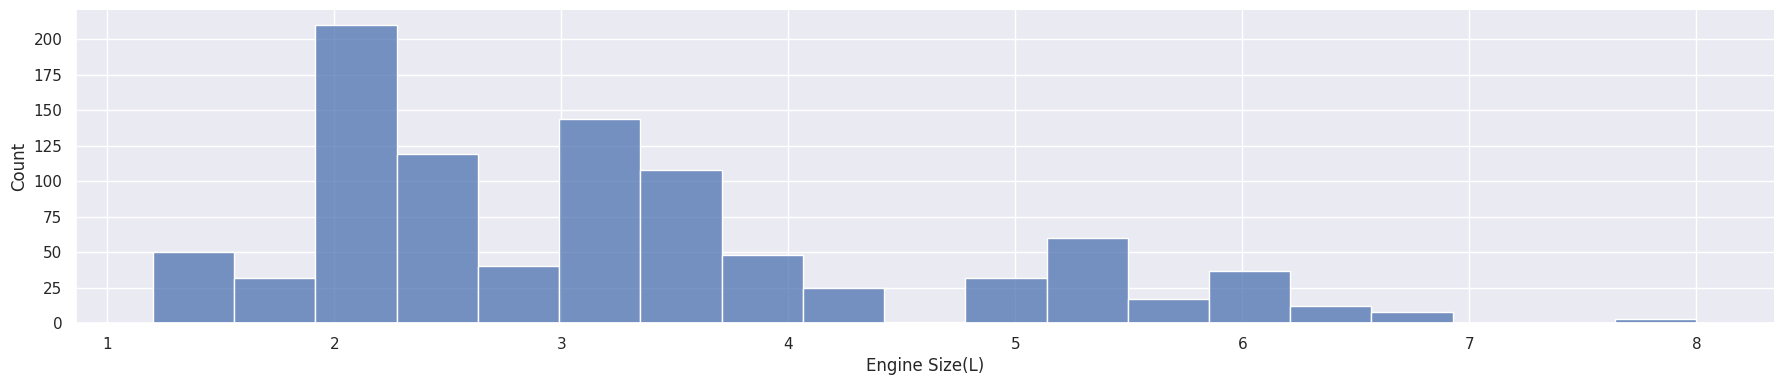

In [425]:

p = sns.displot(data=df, x='Engine Size(L)', height=4, aspect=4.5)
p.fig.set_dpi(100)

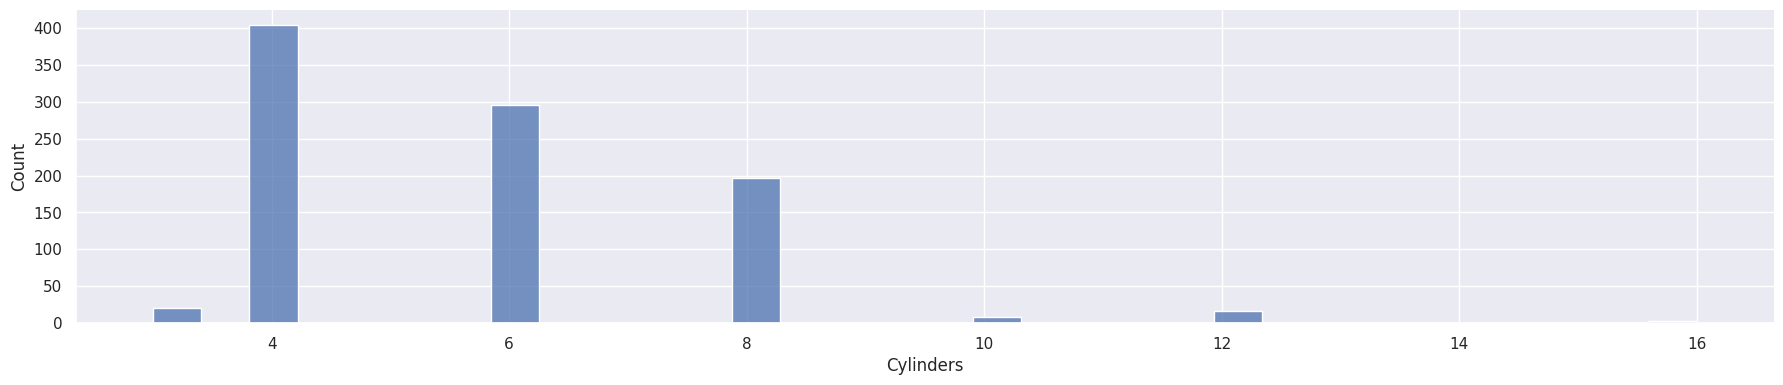

In [426]:
p = sns.displot(data=df, x='Cylinders', height=4, aspect=4.5)
p.fig.set_dpi(100)

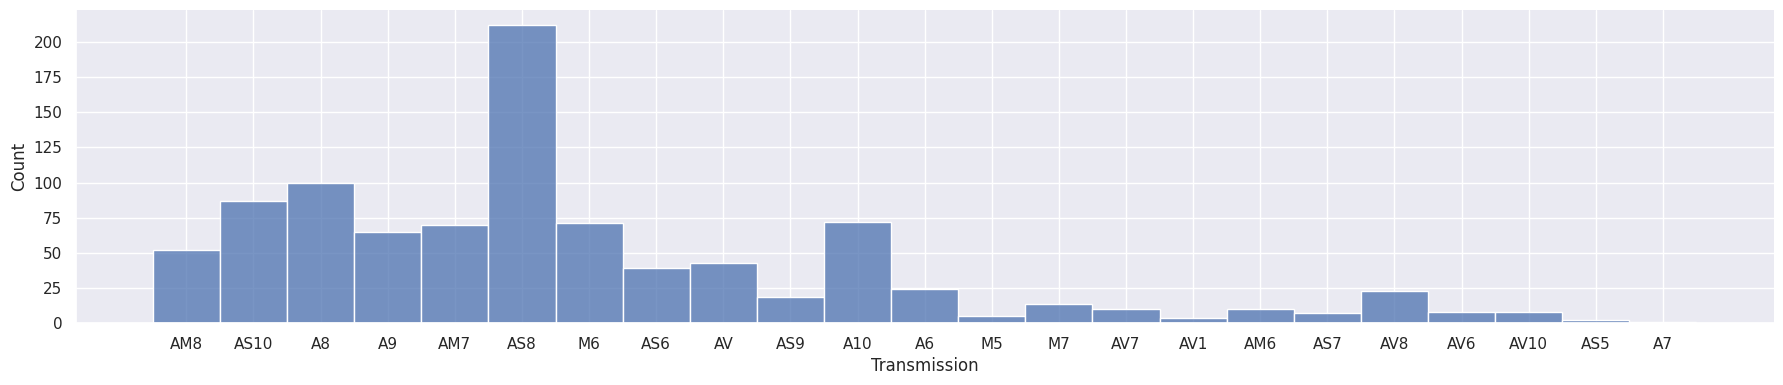

In [427]:
p = sns.displot(data=df, x='Transmission', height=4, aspect=4.5)
p.fig.set_dpi(100)

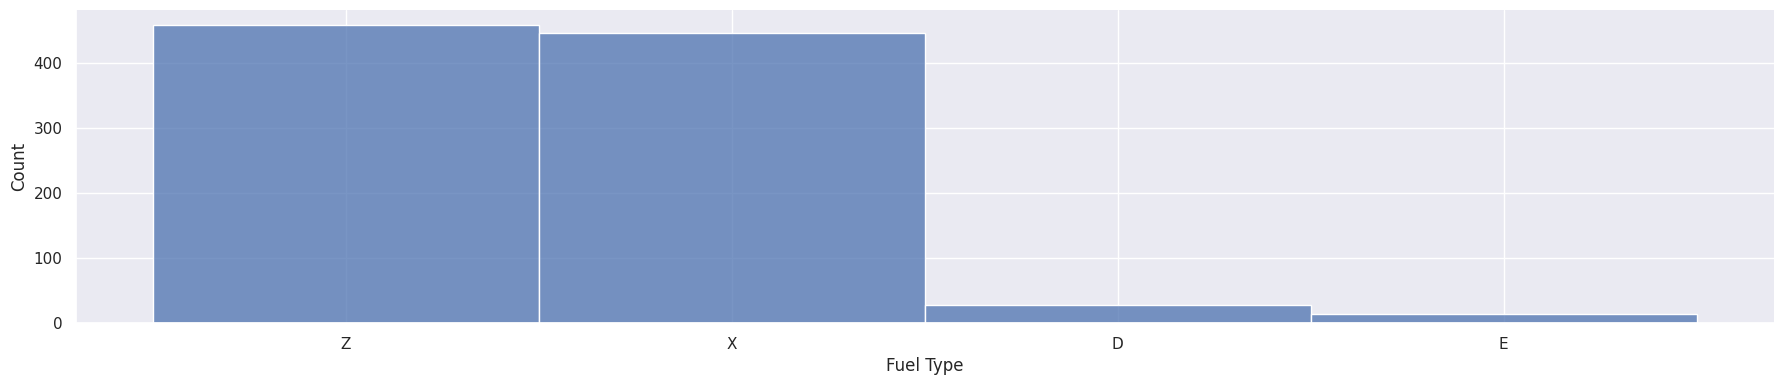

In [428]:
p = sns.displot(data=df, x='Fuel Type', height=4, aspect=4.5)
p.fig.set_dpi(100)

In [429]:
# produce a correlation heatmap and identify any moderate or strong correlations between your target and your features and/or between one feature and another

In [430]:
import seaborn as sns
import matplotlib.pyplot as plt

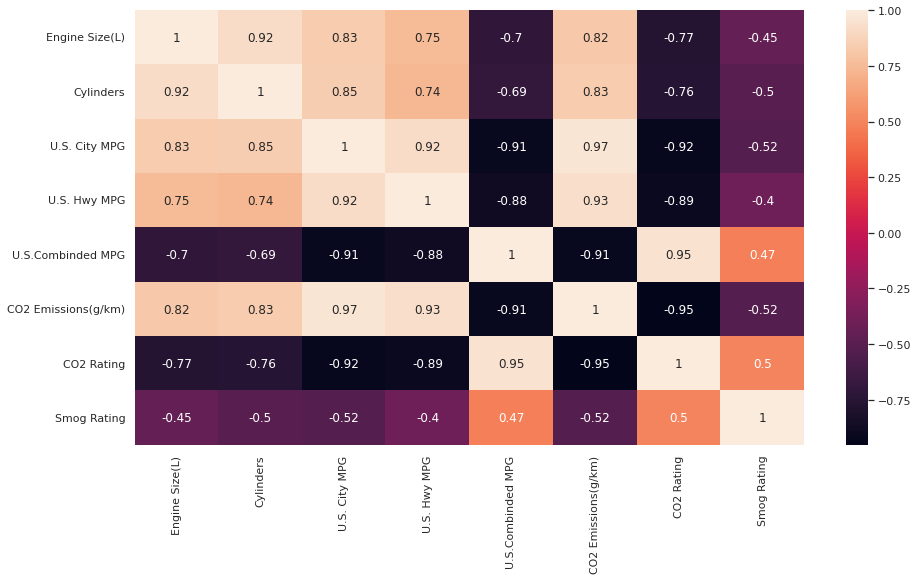

In [431]:
corr = df.corr()
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(corr, annot = True);

In [432]:
 # US Combined Has High Positive Correlation in only CO2 Rating and a Moderate Positive Correlation with Smog Rating. The Negetive Correlations are Statistically drasticly strong In all other catagories. 